In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [4]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Basic information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#to understand basic statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#check for missing values(get 0 if dataset is clean)
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
#data visualization

In [13]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
#clean/remove spaces
df.columns = df.columns.str.strip()
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

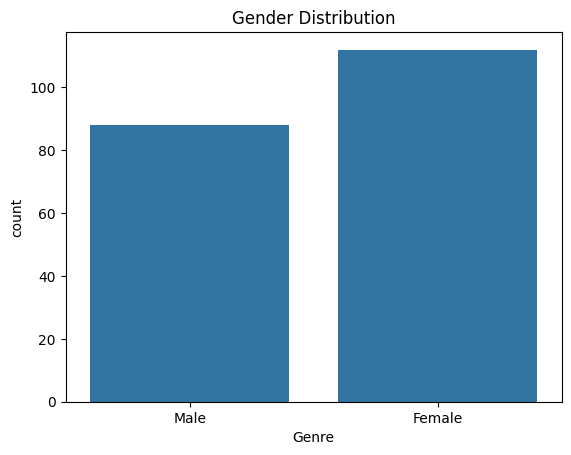

In [17]:
#gender distributn
sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()


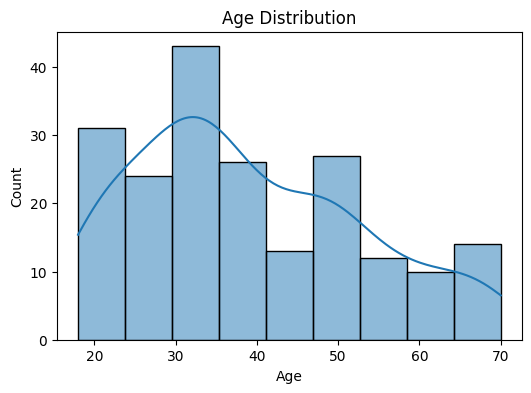

In [18]:
#age ditribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


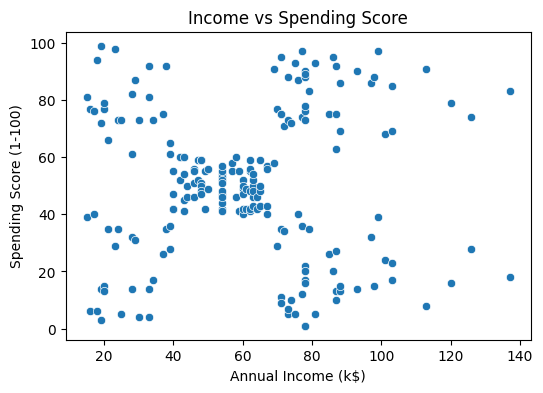

In [20]:
#annual income and spending score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")
plt.show()


In [21]:
#applying kmean clustering

In [22]:
#Step 6.1 — Select features for clustering

#We’ll use only Annual Income and Spending Score:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


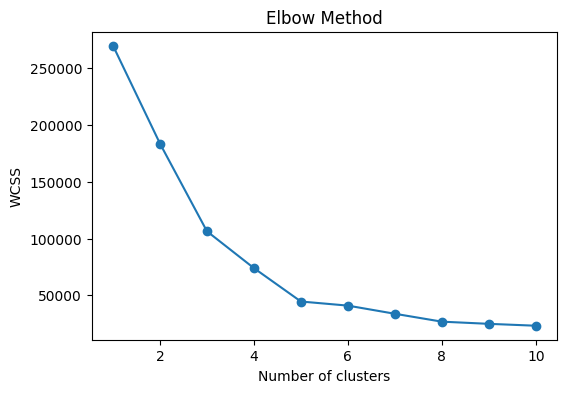

In [24]:
#Step 6.2 — Elbow Method to find optimal clusters

#The Elbow Method helps us choose the best number of clusters k.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
#Step 6.3 — Apply K-Means with optimal k

#Assume the elbow shows k = 5 clusters (common for this dataset):

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


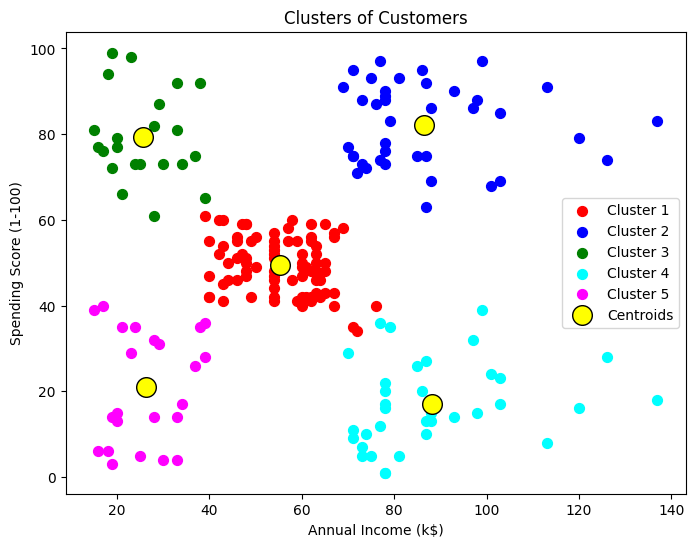

In [26]:
#Step 6.4 — Visualize Clusters
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
#Step 7: Interpreting Clusters

#| Cluster | Characteristics              | Marketing Insight                  |
#| ------- | ---------------------------- | ---------------------------------- |
#| 1       | Low income, low spending     | Low priority customers             |
#| 2       | Medium income, high spending | Loyal and valuable customers       |
#| 3       | High income, high spending   | Premium target segment             |
#| 4       | High income, low spending    | Potential upsell / need engagement |
#| 5       | Medium income, low spending  | Might be price-sensitive           |


In [29]:
#Step 7.1 — See cluster members
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()


#This shows average age, income, spending per cluster, which helps in describing customer behavior.

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [30]:
#Step 7.2 — Add cluster descriptions
cluster_labels = {
    0: 'Careful',
    1: 'Standard',
    2: 'Target',
    3: 'Premium',
    4: 'Low-Spenders'
}

df['Cluster_Name'] = df['Cluster'].map(cluster_labels)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Name
0,1,Male,19,15,39,4,Low-Spenders
1,2,Male,21,15,81,2,Target
2,3,Female,20,16,6,4,Low-Spenders
3,4,Female,23,16,77,2,Target
4,5,Female,31,17,40,4,Low-Spenders


In [31]:
#Step 9: Save Clustered Dataset


# Save the clustered dataset
df.to_csv("Mall_Customers_Clustered.csv", index=False)
print("Clustered dataset saved successfully!")

Clustered dataset saved successfully!


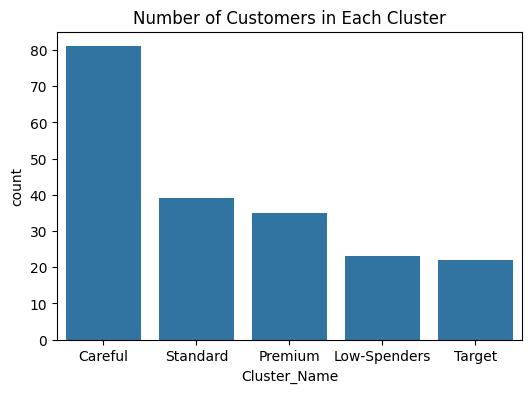

In [32]:
#Step 10: Visualize Cluster Counts
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster_Name', data=df, order=df['Cluster_Name'].value_counts().index)
plt.title("Number of Customers in Each Cluster")
plt.show()


#This gives a quick bar chart showing the size of each customer segment.

In [33]:
#Step 11: Optional Dashboard (Interactive)

#build a Streamlit dashboard:

# Install streamlit (in Colab)
!pip install streamlit

# Example (save this as app.py)
"""
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers_Clustered.csv")
st.title("Mall Customer Clusters Dashboard")

st.write(df.head())

st.subheader("Cluster Counts")
fig, ax = plt.subplots()
sns.countplot(x='Cluster_Name', data=df, order=df['Cluster_Name'].value_counts().index, ax=ax)
st.pyplot(fig)
"""


#This allows you to explore clusters interactively.

#Can run locally or deploy online for your portfolio.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.0 MB/s eta 0:00:00


'\nimport pandas as pd\nimport streamlit as st\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndf = pd.read_csv("Mall_Customers_Clustered.csv")\nst.title("Mall Customer Clusters Dashboard")\n\nst.write(df.head())\n\nst.subheader("Cluster Counts")\nfig, ax = plt.subplots()\nsns.countplot(x=\'Cluster_Name\', data=df, order=df[\'Cluster_Name\'].value_counts().index, ax=ax)\nst.pyplot(fig)\n'